In [1]:
import numpy as np
import sys
import importlib

import masterClass as mc
import imageProcessingTool as dc

import matplotlib.pyplot as plt
from PIL import Image

masterClass working

In [ ]:
#creating object to analyse
a=mc.ImageAnalysis('/Volumes/SANDISK/images/nikon3/28.07.25/1.2%/2025-07-28_singleCellResolving_20xwithExtender_BF_featureImages_mixofExposuretimes_exports/2025-07-28_singleCellResolving+20xwithExtender_BF_featureImages_mixofExposuretimes_MMStack_Default.ome.jpg', None, 4, 4)

#to see masked points
a.getOrientation('fillerText')
#to plot results
bin_centers, correlationAvgNematic = a.produceCorrelationGraph(10000, '1.2% Agar, better Image')

#plotting results
plt.plot(bin_centers, correlationAvgNematic)
plt.show()

In [ ]:
a=mc.ImageAnalysis('/Users/johnwhitfield/Desktop/2025-07-28_singleCellResolving+20xwithExtender_BF_featureImages_mixofExposuretimes_MMStack_Default.ome.jpg', None, 4, 4, 128)



#to see masked points
a.getOrientation('fillerText')
#to plot results
bin_centers, correlationAvgNematic = a.produceCorrelationGraph(10000, '1.2% Agar, better Image', 20)

#plotting results
#plt.plot(bin_centers, correlationAvgNematic)
#plt.show()

In [ ]:
a=mc.ImageAnalysis('/Users/johnwhitfield/Desktop/2025-07-28_singleCellResolving+20xwithExtender_BF_featureImages_mixofExposuretimes_MMStack_Default.ome.jpg', None, 4, 7, 100)



#to see masked points
a.getOrientation('fillerText')
#to plot results
bin_centers, correlationAvgNematic = a.produceCorrelationGraph(10000, '1.2% Agar, better Image')

#plotting results
#plt.plot(bin_centers, correlationAvgNematic)
#plt.show()

plt.imshow(a.processed_png)
plt.axis('off')
plt.show()

In [ ]:
a=mc.ImageAnalysis('/Volumes/SANDISK/images/nikon3/28.07.25/1.2%/2025-07-28_singleCellResolving_20xwithExtender_BF_featureImages_mixofExposuretimes_exports/2025-07-28_singleCellResolving+20xwithExtender_BF_featureImages_mixofExposuretimes_MMStack_Default.ome1.jpg', None, 4, 4, 120)

a.getOrientation('filler')

bin_centers, correlationAvgNematic = a.produceCorrelationGraph(10000, '1.2% Agar, better Image')

#plotting results
#plt.plot(bin_centers, correlationAvgNematic)
#plt.show()



In [ ]:
a=mc.ImageAnalysis('/Volumes/SANDISK/images/nikon3/28.07.25/1.2%/2025-07-28_singleCellResolving_20xwithExtender_BF_featureImages_mixofExposuretimes_exports/2025-07-28_singleCellResolving+20xwithExtender_BF_featureImages_mixofExposuretimes_MMStack_Default.ome1.jpg', None, 4, 4)

a.getOrientation('filler')

bin_centers, correlationAvgNematic = a.produceCorrelationGraphData(10000, '1.2% Agar, better Image')

#plotting results
plt.plot(bin_centers, correlationAvgNematic)
plt.show()



densityWorking

basic ordering calculation

In [ ]:
image_dir='/Volumes/SANDISK/images/nikon3/28.07.25/1.2%/2025-07-28_singleCellResolving_20xwithExtender_BF_featureImages_mixofExposuretimes_exports/2025-07-28_singleCellResolving+20xwithExtender_BF_featureImages_mixofExposuretimes_MMStack_Default.ome.jpg'
img = np.array(Image.open(image_dir))
xsplit = 20
ysplit = 20
cells = dc.splitIntoCells(img, xsplit, ysplit)

a=mc.ImageAnalysis(image_dir, None, 4, 4, 120)
plt.imshow(a.processed_png)

#basic calculation
orderings=dc.calculateOrdering(cells, 4, 120)

print(np.average(orderings, axis=0))

fig, ax = dc.create_nematicOrdering_heatmap(img, cells, orderings, cmap='plasma', alpha=0.3)

plt.show()

In [ ]:
image_dir='/Volumes/SANDISK/images/nikon3/28.07.25/1.2%/2025-07-28_singleCellResolving_20xwithExtender_BF_featureImages_mixofExposuretimes_exports/2025-07-28_singleCellResolving+20xwithExtender_BF_featureImages_mixofExposuretimes_MMStack_Default.ome1.jpg'
img = np.array(Image.open(image_dir))
xsplit = 20
ysplit = 20
cells = dc.splitIntoCells(img, xsplit, ysplit)

a=mc.ImageAnalysis(image_dir, None, 4, 4, 128)
plt.imshow(a.processed_png)


#basic calculation
orderings=dc.calculateOrdering(cells, 4, 128)

print(np.average(orderings, axis=0))

fig, ax = dc.create_nematicOrdering_heatmap(img, cells, orderings, cmap='plasma', alpha=0.3)

plt.show()

qtensor calculation

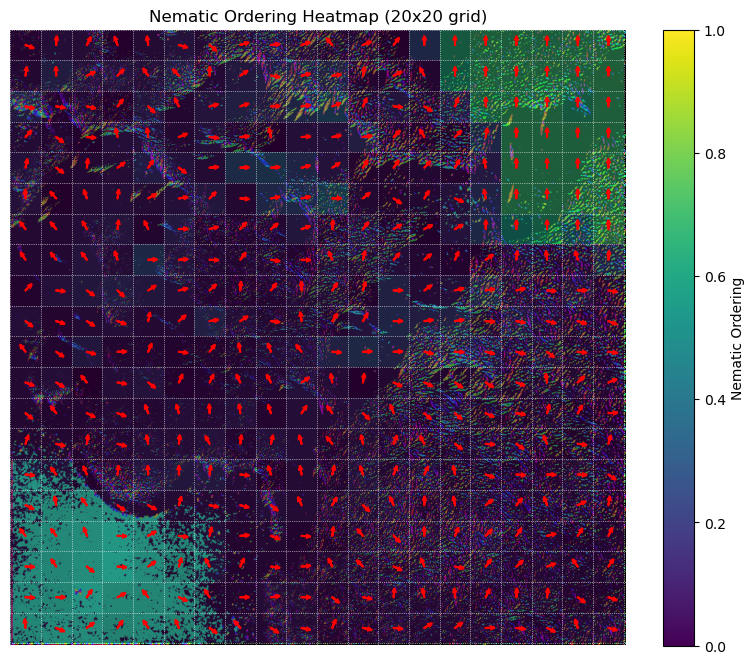

In [9]:
image_dir='/Volumes/SANDISK/images/nikon3/28.07.25/1.2%/2025-07-28_singleCellResolving_20xwithExtender_BF_featureImages_mixofExposuretimes_exports/2025-07-28_singleCellResolving+20xwithExtender_BF_featureImages_mixofExposuretimes_MMStack_Default.ome.jpg'
img = np.array(Image.open(image_dir))
xsplit = 20
ysplit = 20
cells = dc.splitIntoCells(img, xsplit, ysplit)

kernelSize=8
threshold=100

#sneaking in masked image in least hard way - copying threshold and sl in 
a=mc.ImageAnalysis(image_dir, None, 4, kernelSize, threshold)

#passing kernel size and threshold into code
qtensorsInfo=dc.calculateQTensor(cells, kernelSize, threshold)
#print(qtensorsInfo, 'info')

fig, ax = dc.create_nematicOrderingTensor_heatmap(img, cells, qtensorsInfo, masked_image=a.masked)

plt.show()

qtensor on other photo

In [ ]:
image_dir='/Volumes/SANDISK/images/nikon3/28.07.25/1.2%/2025-07-28_singleCellResolving_20xwithExtender_BF_featureImages_mixofExposuretimes_exports/2025-07-28_singleCellResolving+20xwithExtender_BF_featureImages_mixofExposuretimes_MMStack_Default.ome1.jpg'
img = np.array(Image.open(image_dir))
xsplit = 20
ysplit = 20
cells = dc.splitIntoCells(img, xsplit, ysplit)

kernelSize=4
threshold=120

#show processed Images - gives good idea of how appropriate image processing looks
a=mc.ImageAnalysis(image_dir, None, 4, kernelSize, threshold)
#shows images
#a.getOrientation('filler')

qtensorsInfo=dc.calculateQTensor(cells, kernelSize, threshold)
#print(qtensorsInfo, 'info')

fig, ax = dc.create_nematicOrderingTensor_heatmap(img, cells, qtensorsInfo)

plt.show()

Testing Synthetic data

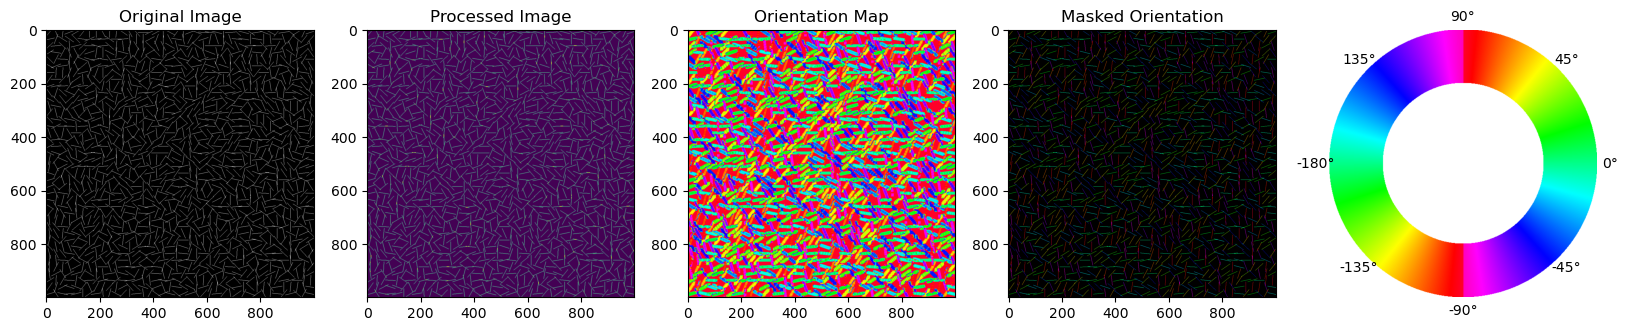

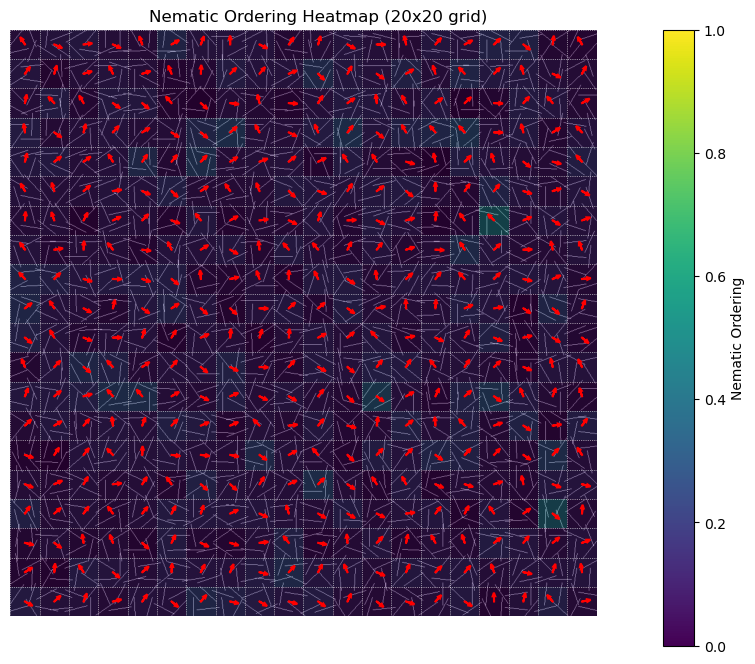

In [10]:
#create synthetic data

#parameters
L, d, N = 1000, 40, 40  # Image size, rod length, grid size
image_random, angles_random = dc.generate_nematic(L, d, N, mode='random')

#now test ordering parameter
img=image_random
xsplit = 20
ysplit = 20
cells = dc.splitIntoCells(img, xsplit, ysplit)

#creating temporary path for image_random such that it can be put into imageanalysis object
temp_path='/tmp/randomImage.tif'
Image.fromarray(img).save(temp_path)

#show processed Images - gives good idea of how appropriate image processing looks
a=mc.ImageAnalysis(temp_path, None, 4, 4, 120)
#shows images
a.getOrientation('filler')

#calculating order
qtensorsInfo=dc.calculateQTensor(cells, 20, 120)
#print(qtensorsInfo, 'info')

fig, ax = dc.create_nematicOrderingTensor_heatmap(img, cells, qtensorsInfo)

plt.show()

In [ ]:
L, d, N = 1000, 40, 40  # Image size, rod length, grid size
image_smooth, angles_smooth = dc.generate_nematic(L, d, N, mode='smooth', correlation_length=7)

#now test ordering parameter
img=image_smooth
xsplit = 8
ysplit = 8
cells = dc.splitIntoCells(img, xsplit, ysplit)

#creating temporary path for image_random such that it can be put into imageanalysis object
temp_path='/tmp/randomImage.tif'
Image.fromarray(img).save(temp_path)

#show processed Images - gives good idea of how appropriate image processing looks
a=mc.ImageAnalysis(temp_path, None, 4, 4, 120)
#shows images
a.getOrientation('filler')

#calculating order
qtensorsInfo=dc.calculateQTensor(cells, 4, 120)
#print(qtensorsInfo, 'info')

fig, ax = dc.create_nematicOrderingTensor_heatmap(img, cells, qtensorsInfo)

plt.show()

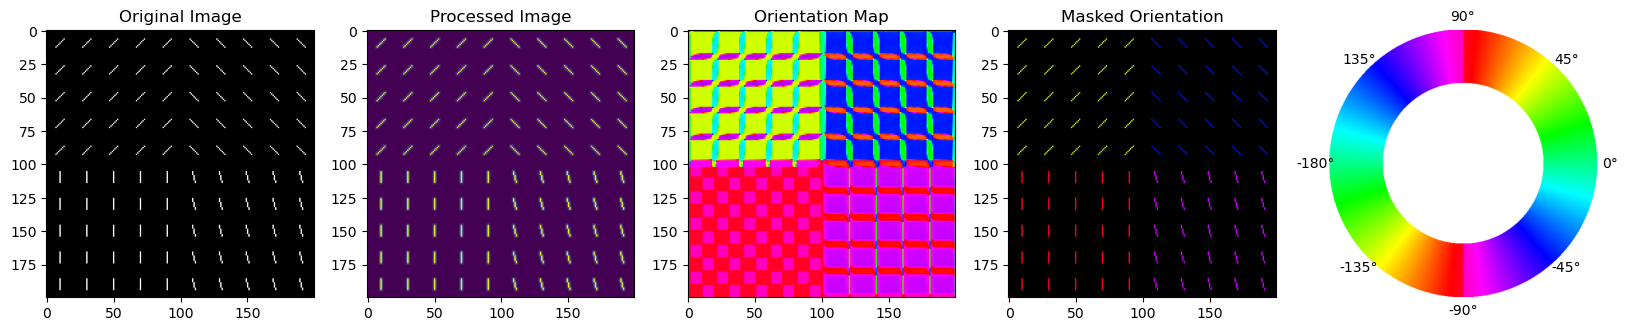

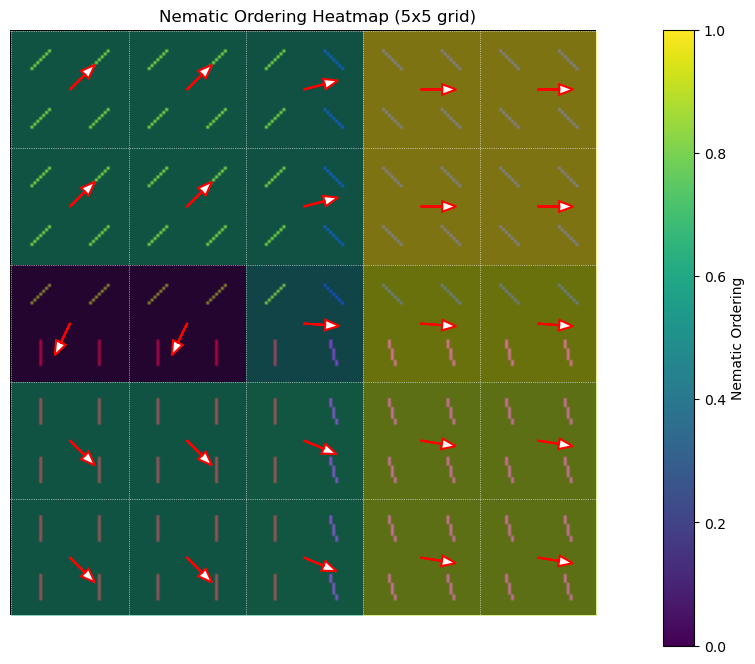

In [24]:
#L, d, N = 1000, 40, 40  # Image size, rod length, grid size
L, d, N = 200, 10, 10
image_domain, angles_domain = dc.generate_nematic(L, d, N, mode='domain', domain_size=5)

#now test ordering parameter
img=image_domain
xsplit = 5
ysplit = 5
cells = dc.splitIntoCells(img, xsplit, ysplit)

kernelSize=8
threshold=10

#creating temporary path for image_random such that it can be put into imageanalysis object
temp_path='/tmp/randomImage.tif'
Image.fromarray(img).save(temp_path)

#show processed Images - gives good idea of how appropriate image processing looks
a=mc.ImageAnalysis(temp_path, None, 4, kernelSize, threshold)
#shows images
a.getOrientation('filler')

#calculating order
qtensorsInfo=dc.calculateQTensor(cells, kernelSize, threshold)
#print(qtensorsInfo, 'info')

fig, ax = dc.create_nematicOrderingTensor_heatmap(img, cells, qtensorsInfo, a.masked)

plt.show()